# Normad

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss,mean_squared_error
%matplotlib inline
seed=2390

## Read data set

In [49]:
path = ''
#path = '../input/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
print('Number of rows and columns in train data set:',train.shape)
print('Number of rows and columns in test data  set:',test.shape)

Number of rows and columns in train data set: (2400, 14)
Number of rows and columns in test data  set: (600, 12)


## Explore data set

In [7]:
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


### RMSLE

In [50]:
def rmsle(y_true,y_pred):
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean())

## Dependant variable distribution

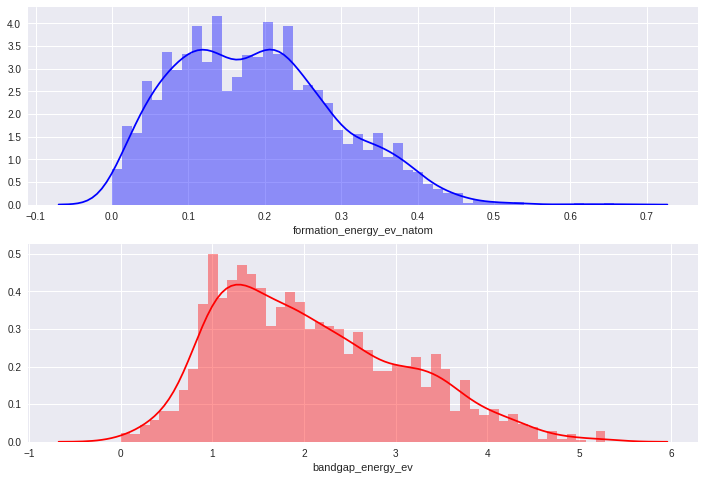

In [9]:
fig,ax = plt.subplots(2,1,figsize=(12,8))
ax1,ax2 = ax.flatten()
sns.distplot(train['formation_energy_ev_natom'],bins=50,ax=ax1,color='b')
sns.distplot(train['bandgap_energy_ev'],bins=50,ax=ax2,color='r')

Distribution of data is not normal, both are right skewed 

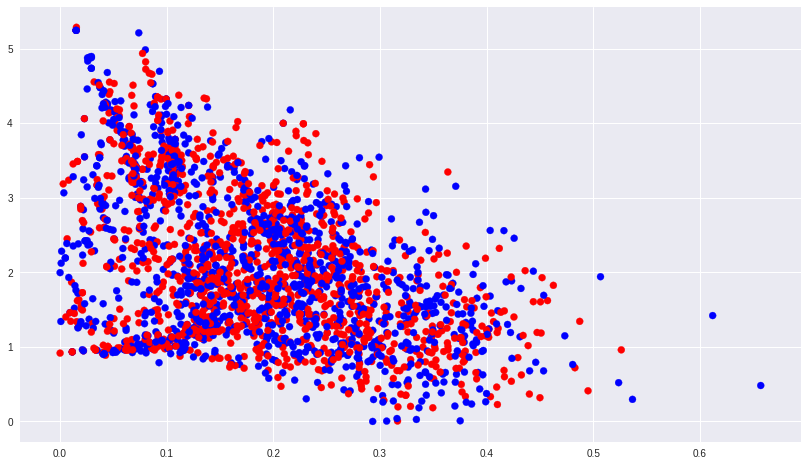

In [5]:
plt.figure(figsize=(14,8))
plt.scatter(train['formation_energy_ev_natom'],train['bandgap_energy_ev'],color=['r','b'])

In [6]:
train.describe()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,141.517917,61.679167,0.385439,0.308601,0.305958,10.030005,7.086977,12.593288,90.243666,92.398971,94.787600,0.187614,2.077205
std,692.964646,84.715548,22.598337,0.265566,0.233717,0.263198,5.645457,1.890330,5.450746,1.333655,5.299734,25.868516,0.104100,1.006845
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.727400,0.000000,0.000100
25%,600.750000,33.000000,40.000000,0.166700,0.093800,0.062500,6.141100,5.833625,9.298000,89.999700,90.000900,89.998700,0.105600,1.278500
50%,1200.500000,194.000000,80.000000,0.375000,0.281200,0.250000,9.537450,6.382950,10.125000,90.001700,90.003550,90.000400,0.181800,1.907850
75%,1800.250000,206.000000,80.000000,0.583300,0.468800,0.468800,10.292100,9.093450,14.372050,90.006200,90.014400,119.998325,0.256275,2.761950
max,2400.000000,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.053500,0.657200,5.286100


## Co relation plot

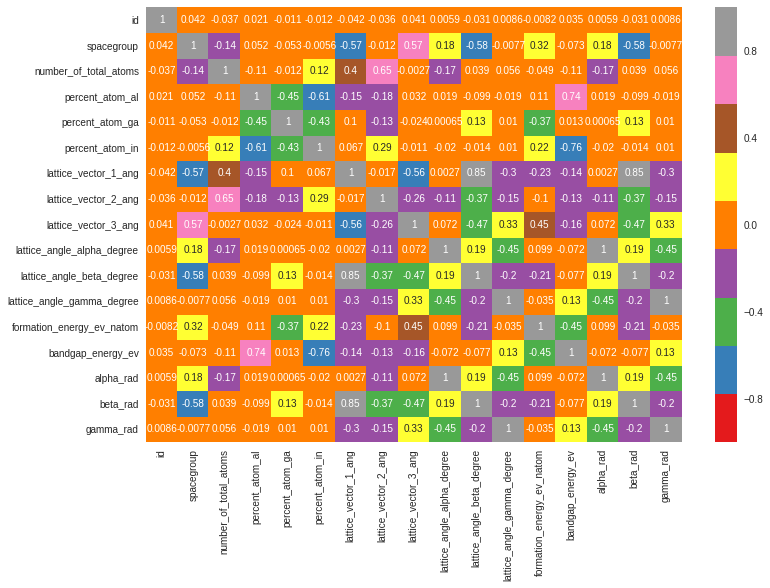

In [20]:
cor = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,cmap='Set1',annot=True)

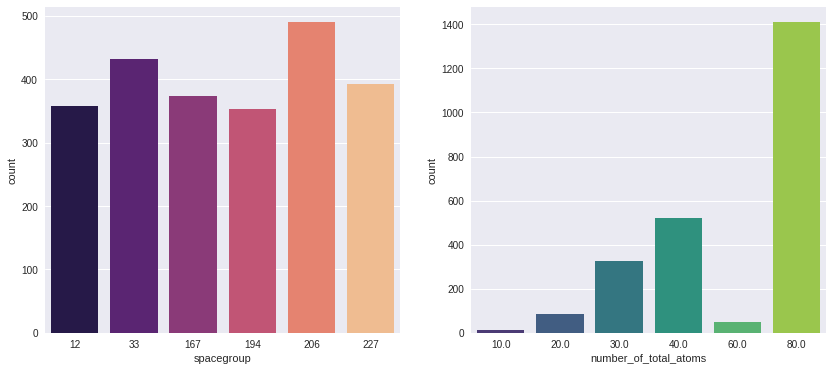

In [85]:
fig,ax = plt.subplots(1,2, figsize=(14,6))
ax1, ax2 = ax.flatten()
sns.countplot(train['spacegroup'], palette = 'magma', ax = ax1)
sns.countplot(x = train['number_of_total_atoms'], palette = 'viridis', ax = ax2)

In [92]:
pd.crosstab(train['number_of_total_atoms'],train['spacegroup'])

spacegroup,12,33,167,194,206,227
number_of_total_atoms,,,,,,
10.0,0,0,0,13,0,0
20.0,84,0,0,0,0,0
30.0,0,0,326,0,0,0
40.0,0,126,0,0,0,393
60.0,0,0,48,0,0,0
80.0,274,306,0,340,490,0


In [51]:
# Degree to radian
train['alpha_rad'] = np.radians(train['lattice_angle_alpha_degree'])
train['beta_rad'] = np.radians(train['lattice_angle_beta_degree'])
train['gamma_rad'] = np.radians(train['lattice_angle_gamma_degree'])

test['alpha_rad'] = np.radians(test['lattice_angle_alpha_degree'])
test['beta_rad'] = np.radians(test['lattice_angle_beta_degree'])
test['gamma_rad'] = np.radians(test['lattice_angle_gamma_degree'])

## Volumn
[Soure](#https://www.kaggle.com/cbartel/random-forest-using-elemental-properties/notebook)

In [52]:
def vol(df):
    """
    Args:
        a (float) - lattice vector 1
        b (float) - lattice vector 2
        c (float) - lattice vector 3
        alpha (float) - lattice angle 1 [radians]
        beta (float) - lattice angle 2 [radians]
        gamma (float) - lattice angle 3 [radians]
    Returns:
        volume (float) of the parallelepiped unit cell
    """
    volumn = df['lattice_vector_1_ang']*df['lattice_vector_2_ang']*df['lattice_vector_3_ang']*np.sqrt(
    1 + 2*np.cos(df['alpha_rad'])*np.cos(df['beta_rad'])*np.cos(df['gamma_rad'])
    -np.cos(df['alpha_rad'])**2
    -np.cos(df['beta_rad'])**2
    -np.cos(df['gamma_rad'])**2)
    df['volumn'] = volumn

In [53]:
vol(train)
vol(test)

In [54]:
# Atomic density
train['density'] = train['number_of_total_atoms'] / train['volumn']
test['density'] = test['number_of_total_atoms'] / test['volumn']

## Mean & Median

In [55]:
def mean_median_feature(df):
    dmean = df.mean()
    dmedian = df.median()
    col = df.columns
    del_col = ['id','formation_energy_ev_natom','bandgap_energy_ev']
    col = [w for w in col if w not in del_col]
    
    for c in col:
        df['mean_'+c] = (df[c] > dmean[c]).astype(np.uint8)
        df['median_'+c] = (df[c] > dmedian[c]).astype(np.uint8)


mean_median_feature(train)
mean_median_feature(test) 


In [58]:
test.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,...,mean_alpha_rad,median_alpha_rad,mean_beta_rad,median_beta_rad,mean_gamma_rad,median_gamma_rad,mean_volumn,median_volumn,mean_density,median_density
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,...,0,0,0,0,0,1,1,1,0,0
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,...,0,1,0,0,0,1,1,0,1,1
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,...,0,0,0,1,1,1,0,0,1,1
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,...,0,0,1,1,0,0,1,1,1,1
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,...,0,0,1,1,0,0,1,1,0,0


In [57]:
col = ['formation_energy_ev_natom','bandgap_energy_ev']
X = train.drop(['id']+col,axis=1)
y = train[col]
x_test = test.drop(['id'],axis=1)

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1 = sc.fit_transform(X)
x_test_1 = sc.fit_transform(x_test)
y = y.values
#y_1 = sc.fit_transform(y)

In [68]:
X.shape

(2400, 48)

## ANN

In [73]:
regressor = Sequential()
#1 and hidden layer
regressor.add(Dense(units = 200, activation = 'relu', kernel_initializer = 'glorot_uniform',input_dim = X.shape[1]))
regressor.add(Dense(units = 40, activation = 'relu', kernel_initializer = 'normal'))
regressor.add(Dense(units = 30, activation = 'relu', kernel_initializer = 'uniform'))
regressor.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'uniform'))
regressor.add(Dense(units = 2, activation = 'relu', kernel_initializer = 'uniform'))

#compile ANN
regressor.compile(optimizer = 'adam', loss = 'mse', metrics =['accuracy'])
regressor.fit(X_1,y,batch_size = 3, epochs = 100, validation_split=0.1)

Train on 2160 samples, validate on 240 samples
Epoch 1/100
2160/2160 [==============================] - 2s - loss: 0.2186 - acc: 0.9861 - val_loss: 0.0498 - val_acc: 0.9958
Epoch 2/100
2160/2160 [==============================] - 2s - loss: 0.0582 - acc: 0.9870 - val_loss: 0.0553 - val_acc: 0.9958
Epoch 3/100
2160/2160 [==============================] - 2s - loss: 0.0578 - acc: 0.9870 - val_loss: 0.0561 - val_acc: 0.9958
Epoch 4/100
2160/2160 [==============================] - 2s - loss: 0.0570 - acc: 0.9870 - val_loss: 0.0513 - val_acc: 0.9958
Epoch 5/100
2160/2160 [==============================] - 2s - loss: 0.0538 - acc: 0.9870 - val_loss: 0.0547 - val_acc: 0.9958
Epoch 6/100
2160/2160 [==============================] - 2s - loss: 0.0549 - acc: 0.9870 - val_loss: 0.0543 - val_acc: 0.9958
Epoch 7/100
2160/2160 [==============================] - 2s - loss: 0.0554 - acc: 0.9870 - val_loss: 0.0600 - val_acc: 0.9958
Epoch 8/100
2160/2160 [==============================] - 2s - loss: 0.0

In [77]:
rmsle(y,regressor.predict(X_1))

0.06013989699026729

In [74]:
y_pred = regressor.predict(x_test_1)
y_pred

array([[ 0.18617636,  1.61250567],
       [ 0.02509931,  3.85602379],
       [ 0.11559382,  3.56418824],
       ..., 
       [ 0.19772229,  0.78863084],
       [ 0.19472095,  2.2502389 ],
       [ 0.20595768,  2.11331964]], dtype=float32)

## Submit prediction

In [75]:
submit = pd.DataFrame({'id':test['id'],'formation_energy_ev_natom':y_pred[:,0],'bandgap_energy_ev':y_pred[:,1]})
submit.to_csv('NN_conductor.csv',index=False)

In [76]:
submit.head()

,bandgap_energy_ev,formation_energy_ev_natom,id
0,1.612506,0.186176,1
1,3.856024,0.025099,2
2,3.564188,0.115594,3
3,3.045120,0.000000,4
4,1.557022,0.127791,5


## Thank you